In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

headers = {'user-agent':'Mozilla/5.0 \
            (Windows NT 10.0; Win64; x64) \
            AppleWebKit/537.36 (KHTML, like Gecko) \
            Chrome/84.0.4147.105 Safari/537.36'}



In [ ]:
urls = [
    'https://groww.in/us-stocks/nke',
    'https://groww.in/us-stocks/ko',
    'https://groww.in/us-stocks/msft',
    'https://groww.in/stocks/m-india-ltd',
    'https://groww.in/us-stocks/axp',
    'https://groww.in/us-stocks/amgn',
    'https://groww.in/us-stocks/aapl',
    'https://groww.in/us-stocks/ba',
    'https://groww.in/us-stocks/csco',
    'https://groww.in/us-stocks/gs',
    'https://groww.in/us-stocks/ibm',
    'https://groww.in/us-stocks/intc',
    'https://groww.in/us-stocks/jpm',
    'https://groww.in/us-stocks/mcd',
    'https://groww.in/us-stocks/crm',
    'https://groww.in/us-stocks/vz',
    'https://groww.in/us-stocks/v',
    'https://groww.in/us-stocks/wmt',
    'https://groww.in/us-stocks/dis'
    ]

In [ ]:
all=[]
for url in urls:
    page = requests.get(url,headers=headers)
    try:
        soup = BeautifulSoup(page.text, 'html.parser')
        company = soup.find('h1', {'class': 'usph14Head displaySmall'}).text
        price = soup.find('span', {'class': 'uht141Pri contentPrimary displayBase'}).text
        change = soup.find('div', {'class': 'uht141Day bodyBaseHeavy contentNegative'}).text
        volume=soup.find('table', {'class': 'tb10Table col l5'}).find_all('td')[1].text
        x=[company,price,change,volume]
        all.append(x)

    except AttributeError:
      print("Change the Element id")
    # Wait for a short time to avoid rate limiting
    time.sleep(10)




Change the Element id
Change the Element id
Change the Element id
Change the Element id
Change the Element id
Change the Element id
Change the Element id


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-2b55c8dbce97>", line 16, in <cell line: 2>
    time.sleep(10)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 248, 

TypeError: object of type 'NoneType' has no len()

Basically, during the extraction of data from a web page, we can expect AttributeError (When we try to access the Tag using BeautifulSoup from a website and that tag is not present on that website then BeautifulSoup always gives an AttributeError). To handle this error let’s use Try and except the concept.

When the try block is executed we are going to extract data from the individual stock and store the data in the variables

Company(name of the stock)
Price (current price)
Change(change of stock value +ve increase or -ve decrease)
Volume(stock volume)

In [ ]:
column_names = ["Company", "Price", "Change", "Volume"]
df = pd.DataFrame(columns=column_names)
for i in all:
    index = 0
    df.loc[index] = i
    df.index = df.index + 1
df = df.reset_index(drop=True)
df



,Company,Price,Change,Volume
0,Nike Inc,$78.40,-0.51(0.65%) 1D,$117.45B
1,Coca-Cola Company The,$65.56,-1.11(1.66%) 1D,$287.20B
2,American Express Co,$270.43,-1.04(0.38%) 1D,$191.23B
3,Amgen Inc,$316.00,-1.17(0.37%) 1D,$170.42B
4,International Business Machines Corp,$210.43,-2.48(1.16%) 1D,$196.12B
5,Intel Corporation,$22.90,-0.02(0.09%) 1D,$98.00B
6,JPMorgan Chase & Co,$222.90,-2.60(1.15%) 1D,$641.58B
7,McDonald's Corp,$295.00,-1.79(0.60%) 1D,$212.90B
8,Verizon Communications Inc,$41.33,-0.29(0.70%) 1D,$175.20B
9,Visa Inc,$281.88,-2.31(0.81%) 1D,$540.66B


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/15XCL5LDR3JxH-8XSAZeEYnIeLi8UCLrhj4pyEwk3Who#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


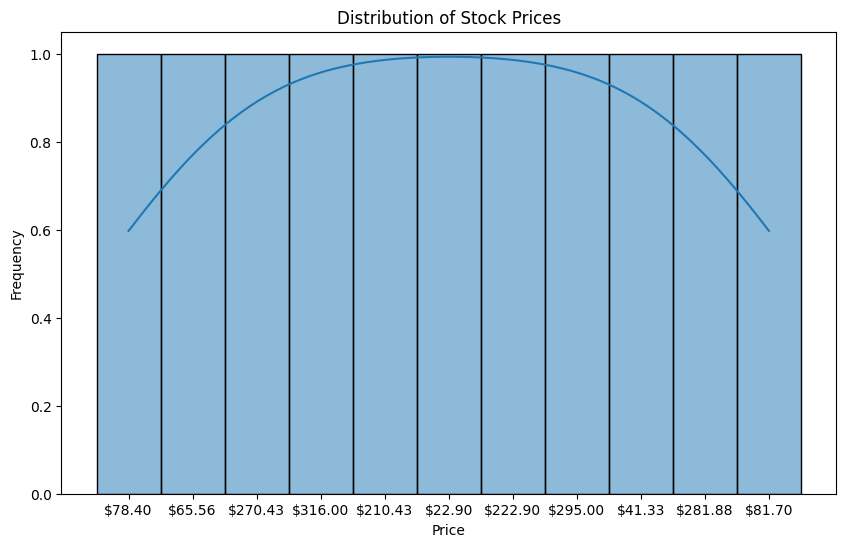

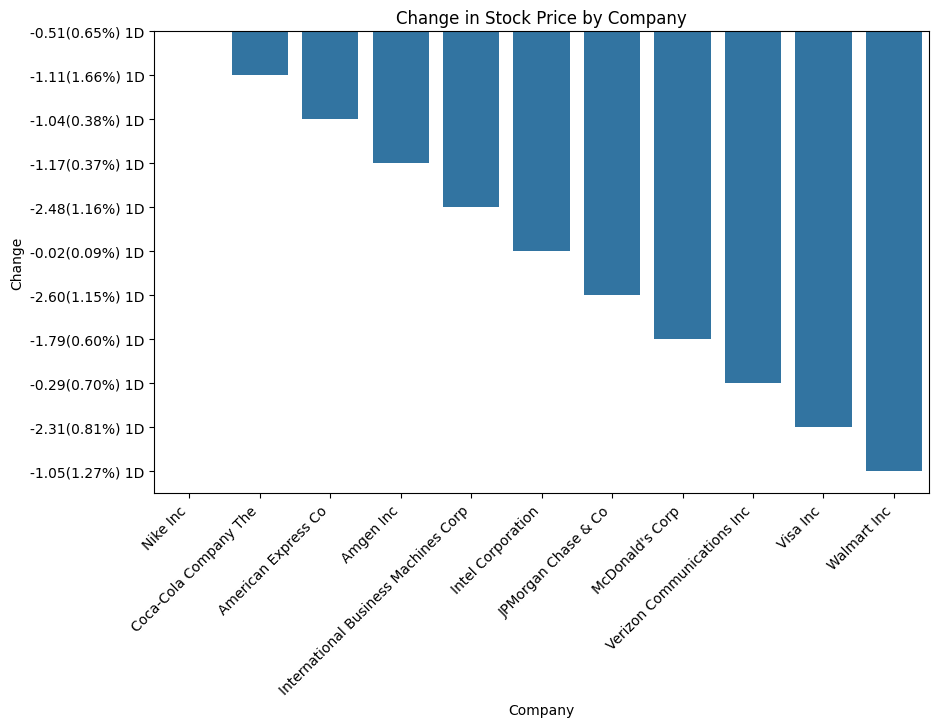

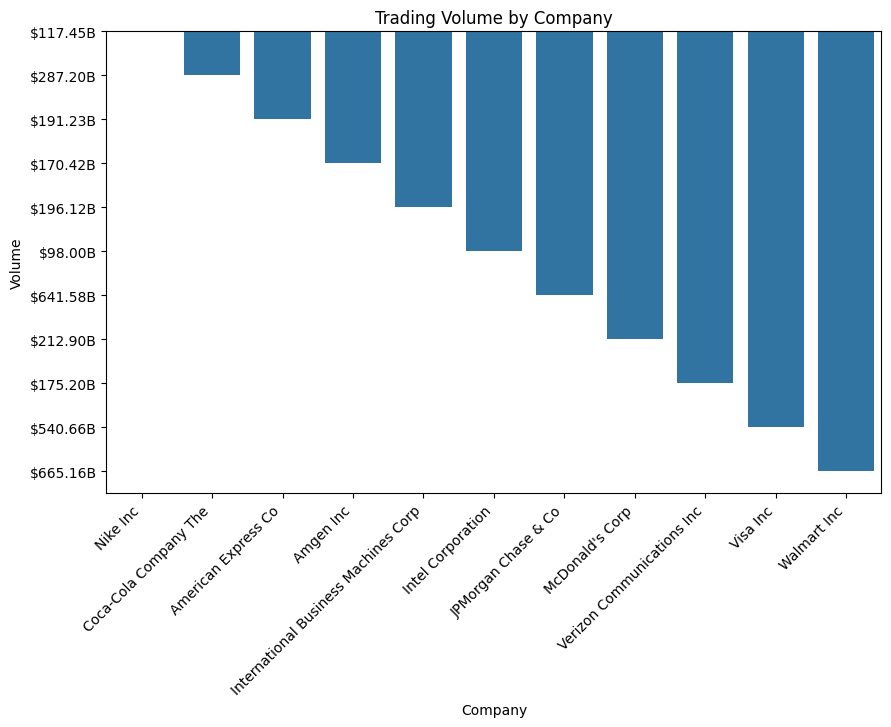

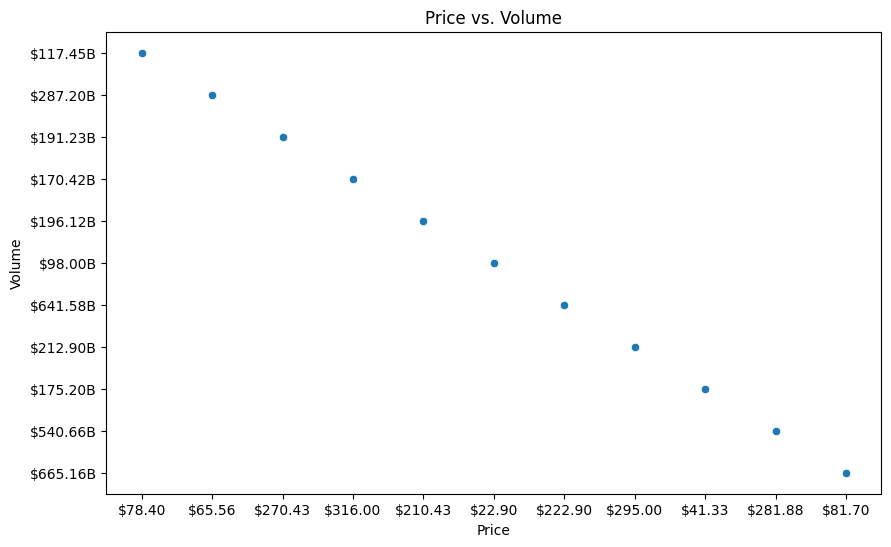

In [ ]:


import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with the stock data

# 1. Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=20, kde=True)
plt.title('Distribution of Stock Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# 2. Change in Price (Bar Chart)
plt.figure(figsize=(10, 6))
sns.barplot(x='Company', y='Change', data=df)
plt.title('Change in Stock Price by Company')
plt.xlabel('Company')
plt.ylabel('Change')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# 3. Volume Comparison (Bar Chart)
plt.figure(figsize=(10, 6))
sns.barplot(x='Company', y='Volume', data=df)
plt.title('Trading Volume by Company')
plt.xlabel('Company')
plt.ylabel('Volume')
plt.xticks(rotation=45, ha='right')
plt.show()


# 4. Scatter plot of Price vs. Volume
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Volume', data=df)
plt.title('Price vs. Volume')
plt.xlabel('Price')
plt.ylabel('Volume')
plt.show()



# Description:

# The code generates four data visualizations:

# 1. **Price Distribution:** This histogram shows how the stock prices are distributed across the dataset. It helps identify the range of prices and whether there are any outliers.

# 2. **Change in Price by Company:** This bar chart displays the change in price for each company. It helps visually compare the performance of different companies. Positive changes are gains and negative changes are losses.

# 3. **Trading Volume by Company:** This bar chart displays the trading volume for each company. It helps understand which stocks are the most actively traded. Higher volume usually implies greater market interest.

# 4. **Price vs. Volume:** The scatter plot shows the relationship between price and volume for each stock. This can potentially help detect correlations between price movements and trading volume. If the price is going up, but volume is low, it means it is not widely bought.

# The code also includes proper titles, labels, and formatting to make the visualizations clear and easy to understand.